Text(0,0.5,'\\hat{m(t)}')

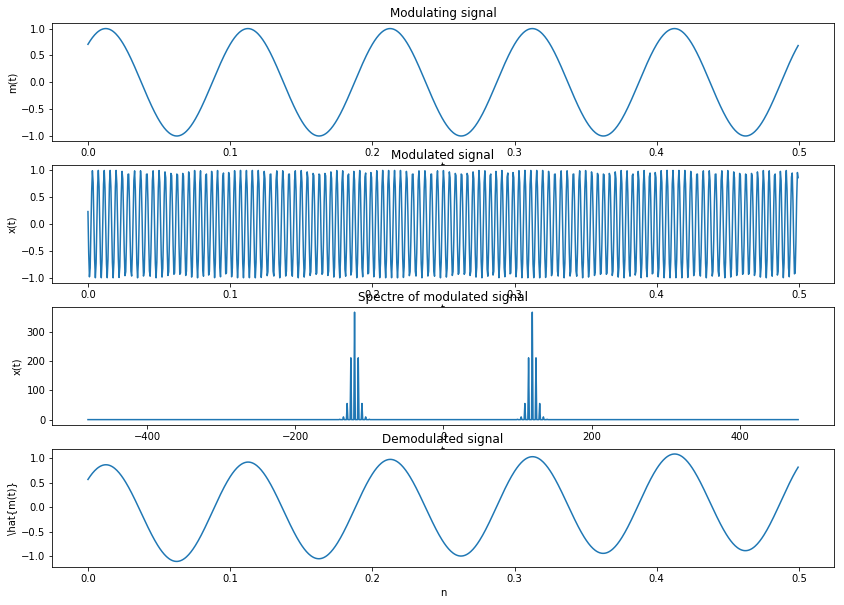

In [6]:
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt
%matplotlib inline
PI = np.pi

fc = 240 #carrier frequency
fm = 10 #frequency of modulating signal
alpha = 1 #amplitude of modulating signal
theta = PI/4 #phase offset of modulating signal
beta = PI/5 #constant carrier phase offset 
receiverKnowsCarrier= False; #If receiver knows the carrier frequency & phase offset

fs = 8*fc #sampling frequency
duration = 0.5 #duration of the signal
t = np.arange(int(fs*duration)) / fs #time base

#Phase Modulation
m_t = alpha*np.sin(2*PI*fm*t + theta) #modulating signal
x = np.cos(2*PI*fc*t + beta + m_t ) #modulated signal

plt.rcParams["figure.figsize"] = [14, 10]
plt.subplot(411)
plt.plot(t,m_t) #plot modulating signal
plt.title('Modulating signal')
plt.xlabel('t')
plt.ylabel('m(t)')
plt.subplot(412)
plt.plot(t,x) #plot modulated signal
plt.title('Modulated signal')
plt.xlabel('t')
plt.ylabel('x(t)')

n = len(x)
d = 1 / t.size
hs = np.fft.fft(x)
fs = np.fft.fftfreq(n, d)
hs = np.fft.fftshift(hs)
amps = np.abs(hs)
fs = np.fft.fftshift(fs)
plt.subplot(413)
plt.title('Spectre of modulated signal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(fs, amps)

#Demodulation of the noisy Phase Modulated signal
z= hilbert(x) #form the analytical signal from the received vector
inst_phase = np.unwrap(np.angle(z))#instaneous phase

#If receiver don't know the carrier, estimate the subtraction term
if receiverKnowsCarrier:
    offsetTerm = 2*PI*fc*t+beta; #if carrier frequency & phase offset is known
else:
    p = np.poly1d(np.polyfit(t,inst_phase,1)) #linearly fit the instaneous phase
    estimated = p(t) #re-evaluate the offset term using the fitted values
    offsetTerm = estimated
                           
demodulated = inst_phase - offsetTerm 

plt.subplot(414)
plt.plot(t,demodulated) #demodulated signal
plt.title('Demodulated signal')
plt.xlabel('n')
plt.ylabel('\hat{m(t)}')